In [1]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Kolmogorov-Smirnov distance
### Contents
    1. 2-sample Kolmogorov-Smirnov distance
    2. Visualization

## 1. 2-sample Kolmogorov-Smirnov distance

Some text # docu: https://stats.stackexchange.com/questions/149595/ks-test-how-is-the-p-value-calculated


In [3]:
# import additional libs
import math
import sys

# function that computes the cumulative distribution function
def ECDF(rand_sample, x_min, x_max, n_steps = 1000 ):
    
    x = np.sort(np.unique(rand_sample))
    x_grid = np.linspace(x_min, x_max, n_steps)
    n = x.size
    
    y = []
    for i in x_grid:
        tmp = x[x <= i]
        frac = tmp.size / n
        y.append(frac)
        
    y = np.array(y)    
    return x_grid, y

In [94]:
# function that computes the KS statistic
def ks_stat(data1, data2, plot_data = False):
    xmin = np.min([data1.min(), data2.min()])
    xmax = np.max([data1.max(), data2.max()])

    x1,y1 = ECDF(data1, xmin, xmax )
    x2,y2 = ECDF(data2, xmin, xmax )
    D = np.max( np.abs(y2 - y1) )
    D_idx = np.argmax( np.abs(y2 - y1) )
    if plot_data == True:
        return D, D_idx, x1, y1, x2, y2
    else:
        return D

In [54]:
# computation of the p_val is a bit tricky computationally
# because it is very numerically unstable for some reason
# that's why we have to use floats and a*a instead of a**2
def ksprob(ks_stat, n, m):
    exp = np.sqrt( float(n*m) / (float(n) + float(m)) )*ks_stat
    prob = 0.0
    termbf = 0.0
    fac = 1.0
    a2 = -2.0*exp*exp
    for j in range(1,101):
        term = fac*2*math.exp(a2*j*j)
        prob += term
        if math.fabs(term) <= 0.001*termbf or math.fabs(term) <= 1.0e-8*prob:
            return prob
        fac = -fac
        termbf = math.fabs(term)

In [125]:
# generate random data
data1 = np.random.randn(100)
data2 = np.random.randn(100)

# compute ks statistic
stat = ks_stat(data1, data2)

# compute corresponding statistic
p_val = ksprob(stat, len(data1), len(data2))

# let's check with scipy
# we will not always find good correspondence in the p-vals, as computation is unstable
# I'm sure the ppl behind scipy will have done a better job than I did
from scipy.stats import ks_2samp
print("we find that ks-stat = "+str(np.round(stat, 3)) + " with p-value "+str(np.round(p_val,3)))
print("scipy thinks that ks-stat = "+str(np.round(ks_2samp(data1, data2)[0], 3)) + " with p-value "+str(np.round(ks_2samp(data1, data2)[1], 3)))

we find that ks-stat = 0.18 with p-value 0.078
scipy thinks that ks-stat = 0.18 with p-value 0.078


## Visualization

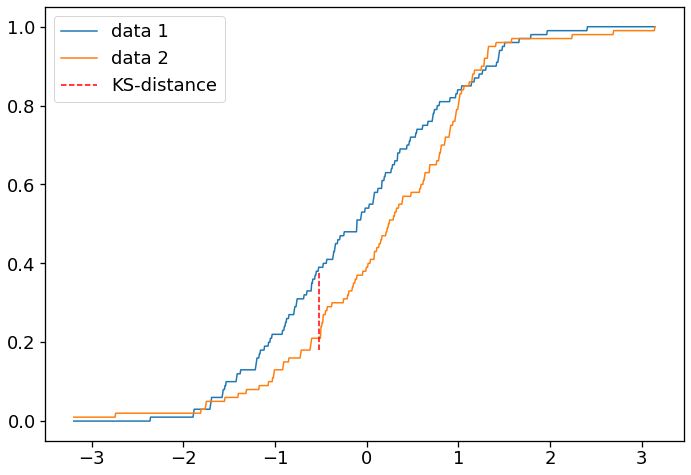

In [134]:
# let's visualize the result
# re-call the ks_stat() function
stat, stat_idx, x1, y1, x2, y2 = ks_stat(data1, data2, plot_data=True)

plt.plot(x1, y1, label='data 1')
plt.plot(x2, y2, label='data 2')
base = np.min([y1[stat_idx], y2[stat_idx]])
#top = np.max([y1[stat_idx], y2[stat_idx]])   # for checking the weird plotting artefact
plt.axvline(x=x1[stat_idx],  ymin=base, ymax=base+stat, color = 'r', linestyle='--', label='KS-distance')
plt.legend()
plt.show()

# note: overshoot of axvline is somehow a plotting artefact. 
# if you don't believe me, replace ymax=base+stat by ymax=top and you'll see